In [1]:
import re, os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.tabular.all import *

from fastai.tabular import *
from fastai.tabular.all import *
from fastai.tabular.data import *
from fastai.tabular.learner import *
from fastai.metrics import *

In [13]:
data_new = pd.read_csv("data_new.csv")
alist = data_new.columns.to_list()
alist

['city_id',
 'land_cover',
 'pop2012',
 'X',
 'Y',
 'road_len',
 'night2012',
 'cen_dist',
 'dem']

In [45]:
cat_names = alist[:2]
cont_names = alist[3:]
y_names = alist[2]
procs = [Categorify,]

In [46]:
splits = RandomSplitter(valid_pct=0.2)(range_of(data_new))

In [47]:
cont,cat = cont_cat_split(data_new, 1, dep_var=y_names)
to = TabularPandas(data_new, procs, cat, cont, y_names=y_names, splits=splits)

In [48]:
len(to.train),len(to.valid)

(347020, 86754)

In [49]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [50]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

In [51]:
draw_tree(m, xs, size=7, leaves_parallel=True, precision=2)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [52]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(xs, y);

In [53]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [54]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.014787, 0.016412)

In [55]:
m.get_n_leaves(), len(xs)

(10166, 347020)

In [56]:
def rf(xs, y, n_estimators=100, max_samples=200_000,
    max_features=0.5, min_samples_leaf=5, **kwargs):

    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
    max_samples=max_samples, max_features=max_features,
    min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

m = rf(xs, y);

In [57]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.012102, 0.014592)

In [58]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [59]:
rmse = r_mse(preds.mean(0), valid_y)
rmse

0.014592

In [60]:
std = data_new.describe().to_dict()['pop2012']['std']
R2 = 1 - ( rmse / std ) ** 2
R2

0.7822588840083627

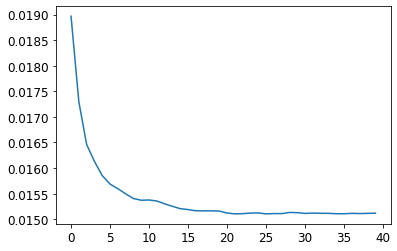

In [42]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [43]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
preds.shape

(100, 86754)

In [44]:
preds_std = preds.std(0)
preds_std[:5]

array([2.22574105e-04, 5.17668375e-03, 6.04157843e-02, 9.16514317e-03, 1.37035971e-06])